In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.regularizers import l2



In [2]:
%matplotlib inline


In [3]:
path_to_csv = "../data/housing_data.csv"
image_dir = "../data/images/" 
column_names = ["id", "url", "imageurl", "header", "price", "sqmprice", "sqm", "floor", "rooms", "bedrooms", "address"]


In [4]:
df = pd.read_csv(path_to_csv, names=column_names, header=None)
image_files = set(os.listdir(image_dir))
valid_ids = {int(filename.split('.')[0]) for filename in image_files if filename.split('.')[0].isdigit()}
df = df[df.iloc[:, 0].isin(valid_ids)]
df = df.dropna() # We lost 5% of the data, problem seems to be with the method of scraping or the website error itself
df.drop(['url', 'imageurl'], axis=1, inplace=True)

In [5]:
def modify_address(addr):
    parts = addr.split(',', 1)  
    return parts[1].strip() if len(parts) > 1 else addr

In [6]:
#mask = df["address"].isin(df["address"].value_counts()[df["address"].value_counts() < 30].index)

# Filter the dataframe using the mask
#df.loc[mask, 'address'] = df.loc[mask, 'address'].apply(modify_address)
#df['address'] = df['address'].str.replace(', ', '', regex=True)
#mask = df["address"].isin(df["address"].value_counts()[df["address"].value_counts() < 30].index)

#df.loc[mask, 'address'] = df.loc[mask, 'address'].apply(modify_address)

#mask = df["address"].isin(df["address"].value_counts()[df["address"].value_counts() > 40].index)

#df = df[mask]

In [7]:
#df['address'] = df['address'].str.replace(', ', '', regex=True)

In [8]:
#df[df['address'].str.startswith('')]

In [9]:
#df["address"].value_counts()

In [10]:
before_scaling_df = df

In [11]:
df['status'] = df['header'].str.split().str.get(1)
df['location_name'] = df['header'].str.replace("იყიდება ახალი აშენებული ბინა ", "", regex=False).str.strip()
df['location_name'] = df['location_name'].str.replace("იყიდება ძველი აშენებული ბინა ", "", regex=False).str.strip()
df['location_name'] = df['location_name'].str.replace("იყიდება მშენებარე ბინა ", "", regex=False).str.strip()

value_counts = df['location_name'].value_counts()
print(value_counts)
# Keep only rows where the 'location_name' value count is >= 30
df = df[df['location_name'].isin(value_counts[value_counts >= 30].index)]
df.drop(['header'], axis=1, inplace=True)


location_name
საბურთალოზე                           863
დიდ დიღომში                           340
ვაკეში                                318
გლდანის მასივში                       226
ისანში                                170
                                     ... 
ფონიჭალაში                              1
მხატვრის დასახლებაში                    1
ვარკეთილის მასივი III კვარტალის VI      1
სტუდენტების დასახლებაში                 1
ძველ ვეძისში                            1
Name: count, Length: 110, dtype: int64


/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_3336/3830233740.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['header'], axis=1, inplace=True)


In [12]:
df["price"] = df["price"].str.replace(",", "").astype(float)
df["sqm"] = df["sqm"].str.replace(" მ²", "").astype(float)
df["floor"] = df["floor"].str.replace("სარ.", "").astype(float)
df["rooms"] = df["rooms"].str.replace("ოთ.", "").astype(float)
df["bedrooms"] = df["bedrooms"].str.replace("საძ.", "").astype(float)
df.drop("sqmprice", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)



/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_3336/3070115346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].str.replace(",", "").astype(float)
/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_3336/3070115346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqm"] = df["sqm"].str.replace(" მ²", "").astype(float)
/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_3336/3070115346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [13]:
df.sort_values(by='price', ascending=True)

,price,sqm,floor,rooms,bedrooms,address,status,location_name
1802,6500.0,59.0,10.0,3.0,2.0,"მირიან მეფის ქუჩა, დიდი დიღომი, საბურთალოს რაი...",ახალი,დიდ დიღომში
3482,12500.0,22.0,1.0,1.0,1.0,"ი. ჯავახიშვილის ქუჩა, ჩუღურეთის რაიონი, თბილისი",ძველი,ჩუღურეთის რაიონში
1422,12500.0,22.0,1.0,1.0,1.0,"ი. ჯავახიშვილის ქუჩა, ჩუღურეთის რაიონი, თბილისი",ძველი,ჩუღურეთის რაიონში
3198,13000.0,120.0,5.0,3.0,2.0,"ო. ლორთქიფანიძის ქუჩა, საბურთალო, საბურთალოს რ...",ახალი,საბურთალოზე
2324,13000.0,10.0,1.0,1.0,1.0,"ვაჟა ფშაველას გამზირი, საბურთალო, საბურთალოს რ...",ძველი,საბურთალოზე
...,...,...,...,...,...,...,...,...
3342,920000.0,400.0,8.0,7.0,4.0,"ზ. ფალიაშვილის ქუჩა, ვაკე, ვაკის რაიონი, თბილისი",ახალი,ვაკეში
2447,920000.0,400.0,3.0,9.0,6.0,"თაბუკაშვილის ქ. 19ა, მთაწმინდა, მთაწმინდის რაი...",ახალი,მთაწმინდაზე
611,990000.0,600.0,5.0,4.0,3.0,"საბურთალო, საბურთალო, საბურთალოს რაიონი, თბილისი",ახალი,საბურთალოზე
209,1110000.0,280.0,12.0,7.0,3.0,"ირაკლი აბაშიძის 70, ი. აბაშიძის ქუჩა, ვაკე, ვა...",ახალი,ვაკეში


In [14]:
df = df[df["price"] <= 1000000]
df = df[df["price"] >= 5000]


In [15]:
scaler = MinMaxScaler()
price_scaler = MinMaxScaler()
df.drop(columns=["address"], inplace=True)
df[['sqm', 'floor', 'rooms', 'bedrooms']] = scaler.fit_transform(df[['sqm', 'floor', 'rooms', 'bedrooms']])
df[['price']] = price_scaler.fit_transform(df[['price']])

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['location_name', "status"])

bool_cols = [col for col in df.columns if df[col].dtype == 'bool']
df[bool_cols] = df[bool_cols].astype(int)
# Split the data into training and test sets
y = df['price']
X = df.drop('price', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
df

,price,sqm,floor,rooms,bedrooms,location_name_ავლაბარში,location_name_ბაგებში,location_name_გლდანი 1 მკრ. რაიონში,location_name_გლდანის მასივში,location_name_დიდ დიღომში,...,location_name_საბურთალოზე,location_name_საბურთალოს რაიონში,location_name_სამგორის რაიონში,location_name_სანზონაში,location_name_სოლოლაკში,location_name_ჩუღურეთის რაიონში,location_name_ჩუღურეთში,status_ახალი,status_მშენებარე,status_ძველი
0,0.150991,0.118592,0.235294,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.120488,0.094908,0.029412,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.166243,0.140585,0.323529,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.150991,0.116901,0.235294,0.222222,0.142857,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.081851,0.128743,0.352941,0.222222,0.142857,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,0.064362,0.081374,0.294118,0.222222,0.142857,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5275,0.196746,0.128743,0.088235,0.222222,0.142857,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5276,0.079817,0.098291,0.058824,0.111111,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5277,0.288155,0.412959,0.000000,0.555556,0.285714,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
from tensorflow.keras.layers import Dropout

input_layer = keras.Input(shape=(X_train.shape[1],))

x = layers.Dense(512, kernel_initializer='he_normal')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = Dropout(0.1)(x) 

x = layers.Dense(256, kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = Dropout(0.1)(x) 

x = layers.Dense(128, kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = Dropout(0.1)(x)  

x = layers.Dense(128, kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = Dropout(0.1)(x) 

output_layer = layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)


In [18]:
model.compile(optimizer=keras.optimizers.legacy.Adam(0.001), loss='mean_squared_error',  metrics=['mean_absolute_error', keras.metrics.RootMeanSquaredError() ])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=50, 
                               restore_best_weights=True)

In [20]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_dev, y_dev),  callbacks=[early_stopping])

Epoch 1/300


98/98 [==============================] - 1s 3ms/step - loss: 0.2970 - mean_absolute_error: 0.4175 - root_mean_squared_error: 0.5450 - val_loss: 0.0228 - val_mean_absolute_error: 0.1183 - val_root_mean_squared_error: 0.1510
Epoch 2/300
98/98 [==============================] - 0s 2ms/step - loss: 0.1260 - mean_absolute_error: 0.2755 - root_mean_squared_error: 0.3550 - val_loss: 0.0181 - val_mean_absolute_error: 0.1067 - val_root_mean_squared_error: 0.1345
Epoch 3/300
98/98 [==============================] - 0s 3ms/step - loss: 0.0819 - mean_absolute_error: 0.2205 - root_mean_squared_error: 0.2863 - val_loss: 0.0137 - val_mean_absolute_error: 0.0974 - val_root_mean_squared_error: 0.1170
Epoch 4/300
98/98 [==============================] - 0s 2ms/step - loss: 0.0597 - mean_absolute_error: 0.1873 - root_mean_squared_error: 0.2444 - val_loss: 0.0071 - val_mean_absolute_error: 0.0612 - val_root_mean_squared_error: 0.0843
Epoch 5/300
98/98 [==============================] - 0s 2ms/step - loss:

In [21]:
model.save('only_csv_model')

INFO:tensorflow:Assets written to: only_csv_model/assets


INFO:tensorflow:Assets written to: only_csv_model/assets


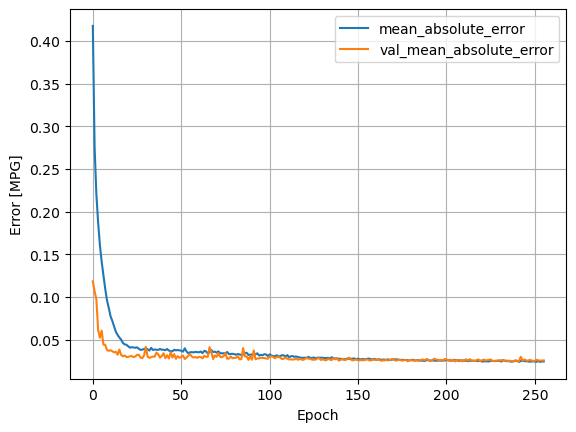

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
def plot_mae(history):
  plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
  plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)  
#plot_loss(history)
plot_mae(history)

In [23]:
loss, mae, mse = model.evaluate(X_dev, y_dev)
train_loss, train_mae, train_mse = model.evaluate(X_train, y_train)

print(f"Test Loss: {loss}")
scaled_mae = mae
scaled_train_mae = train_mae
original_mae = scaled_mae * (price_scaler.data_max_ - price_scaler.data_min_)
original_train_mae = scaled_train_mae * (price_scaler.data_max_ - price_scaler.data_min_)

print(f"Original MAE: {mae}")
print(f"Original train MAE: {train_mae}")
print(f"Original mse: {mse}")
print(f"Original train mse: {train_mse}")

print(f"Scaled MAE: {original_mae[0]}")
print(f"Scaled train MAE: {original_train_mae[0]}")


98/98 [==============================] - 0s 617us/step - loss: 0.0014 - mean_absolute_error: 0.0217 - root_mean_squared_error: 0.0380
Test Loss: 0.001582517521455884
Original MAE: 0.02445034869015217
Original train MAE: 0.021705349907279015
Original MAPE: 0.0397808700799942
Original train MAPE: 0.03803631663322449
Scaled MAE: 24046.917936764657
Scaled train MAE: 21347.21163380891


In [24]:
from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)
y_pred_dev = model.predict(X_dev)
r2_train = r2_score(y_train, y_pred_train)
r2_dev = r2_score(y_dev, y_pred_dev)
print(f"R2 - Train Score: {r2_train}")
print(f"R2 - Dev Score: {r2_dev}")


13/13 [==============================] - 0s 629us/step
R2 - Train Score: 0.8390519488812755
R2 - Dev Score: 0.7841961592999163


In [28]:
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)

original_test_mae = test_mae * (price_scaler.data_max_ - price_scaler.data_min_)

y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Original Test MAE: {test_mae}")
print(f"Original Test mse: {test_mse}")
print(f"Scaled Test MAE: {original_test_mae[0]}")


print(f"R2 - Test Score: {r2_test}")



13/13 [==============================] - 0s 733us/step
Original Test MAE: 0.026502151042222977
Original Test mse: 0.04727613553404808
Scaled Test MAE: 26064.865550026298
R2 - Test Score: 0.7730002241081462
